In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
startup = pd.read_csv('50_Startups.csv')
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


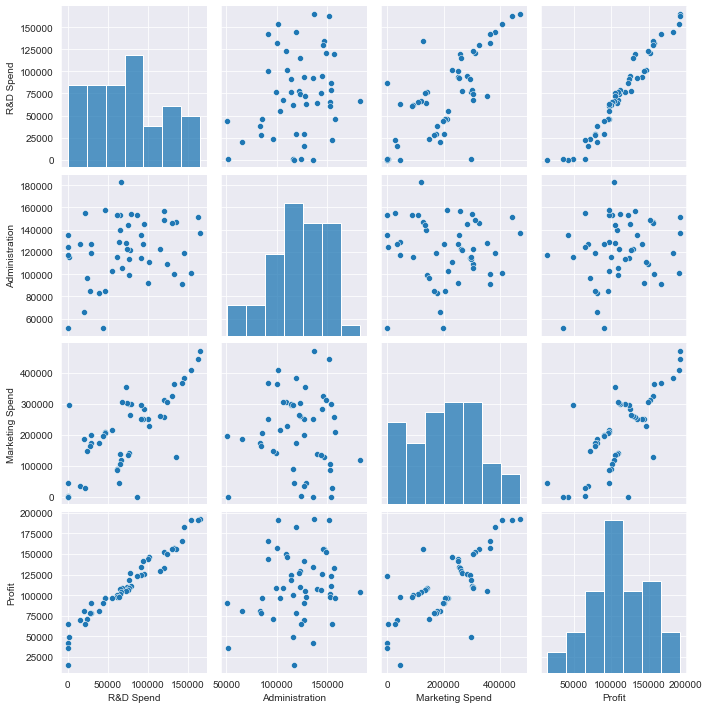

In [8]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)

In [9]:
startup1 = startup.rename({'R&D Spend':'R_D_Spend','Marketing Spend':'Marketing_Spend'},axis = 1)
startup1

,R_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [12]:
import statsmodels.formula.api as smf 
model = smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend', data = startup1).fit()

In [13]:
model.params

Intercept          50122.192990
R_D_Spend              0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [14]:
#t and p-Values

print(model.tvalues, '\n', model.pvalues)

Intercept           7.626218
R_D_Spend          17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 
 Intercept          1.057379e-09
R_D_Spend          2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


In [15]:
#R squared values

(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           4.53e-30
Time:                        11:38:02   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R_D_Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# Simple Linear Regression model

ml_a = smf.ols('Profit~Administration', data = startup1).fit()  
print(ml_a.tvalues, '\n', ml_a.pvalues)  

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [23]:
ml_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 27 Apr 2022   Prob (F-statistic):              0.162
Time:                        11:41:28   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
ml_m = smf.ols('Profit~Marketing_Spend', data = startup1).fit()  
print(ml_m.tvalues, '\n', ml_m.pvalues)  

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


In [25]:
ml_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           4.38e-10
Time:                        11:41:58   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_Spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
ml_am = smf.ols('Profit~Administration+Marketing_Spend',data = startup1).fit()  
print(ml_am.tvalues, '\n', ml_am.pvalues)  

Intercept          1.142741
Administration     2.467779
Marketing_Spend    8.281039
dtype: float64 
 Intercept          2.589341e-01
Administration     1.729198e-02
Marketing_Spend    9.727245e-11
dtype: float64


In [27]:
ml_am.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           2.50e-10
Time:                        11:44:24   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration      0.3237      0.131      2.468      0.017       0.060       0.588
Marketing_Spend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# Calculating VIF

rsq_R_D_Spend = smf.ols('R_D_Spend~Administration+Marketing_Spend', data = startup1).fit().rsquared  
vif_R_D_Spend = 1/(1-rsq_R_D_Spend) 

rsq_Administration = smf.ols('Administration~R_D_Spend+Marketing_Spend', data = startup1).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration) 

rsq_Marketing_Spend = smf.ols('Marketing_Spend~R_D_Spend+Administration', data = startup1).fit().rsquared  
vif_Marketing_Spend = 1/(1-rsq_Marketing_Spend) 

In [29]:
# Storing VIF values in a data frame

d1 = {'Variables':['R_D_Spend', 'Administration', 'Marketing_Spend'], 'VIF':[vif_R_D_Spend, vif_Administration, vif_Marketing_Spend]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,R_D_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


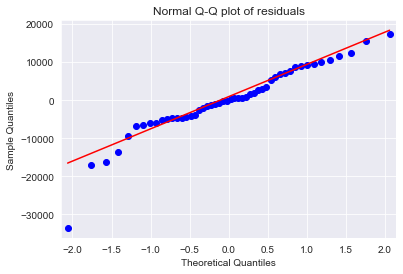

In [31]:
# Residual Analysis

import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

qqplot = sm.qqplot(model.resid, line = 'q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [32]:
list(np.where(model.resid > 5)) 

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [33]:
# Residual plot for Homoscedasticity

def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

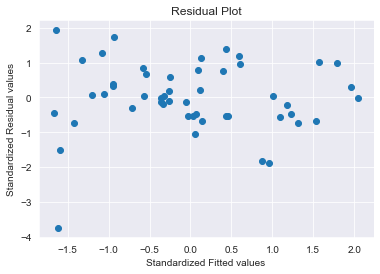

In [34]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized Residual values')
plt.show()

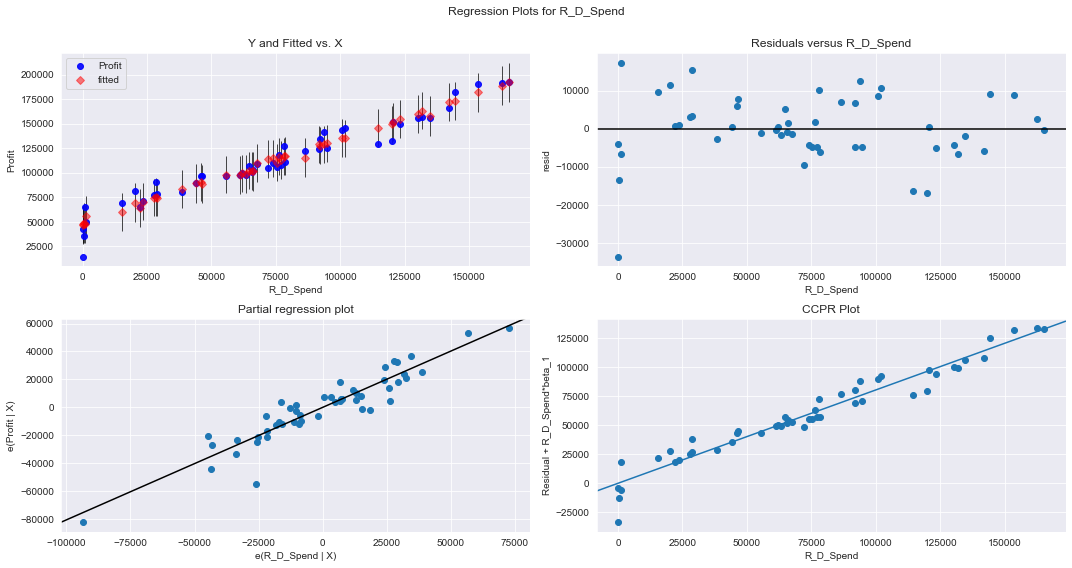

In [70]:
# Residual vs Regressor

fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, "R_D_Spend", fig = fig)
plt.show()

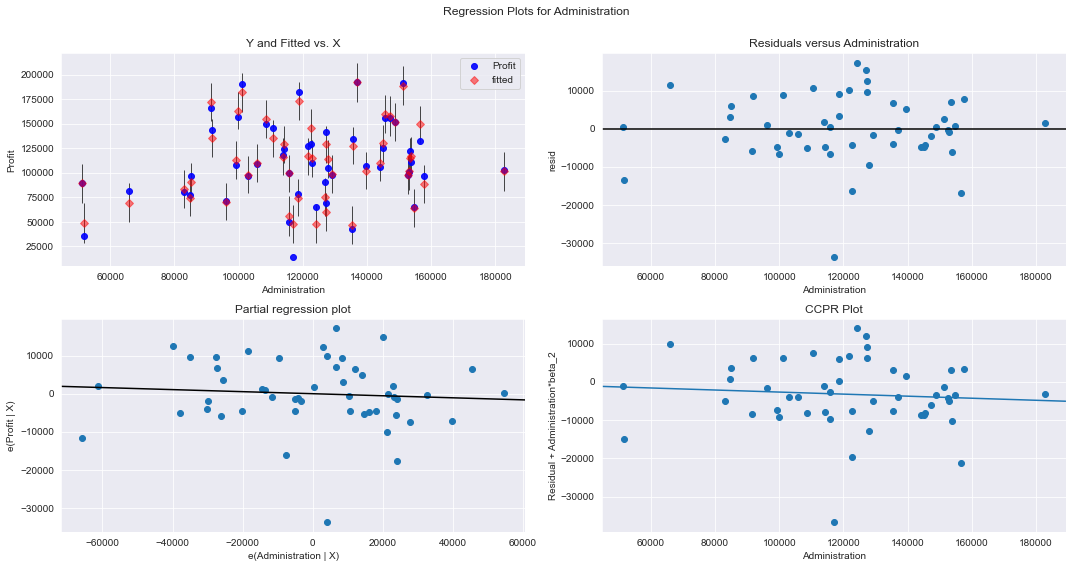

In [38]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig = fig)
plt.show()

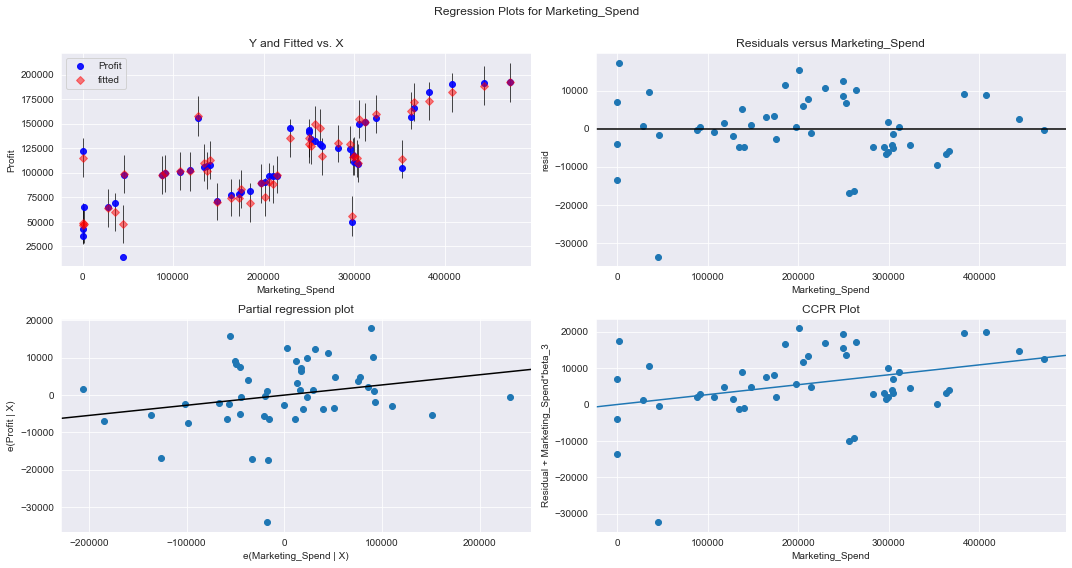

In [39]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig = fig)
plt.show()

In [40]:
# Model Deletion Diagnostics
# Detecting Influencers/Outliers using Cook's distance

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

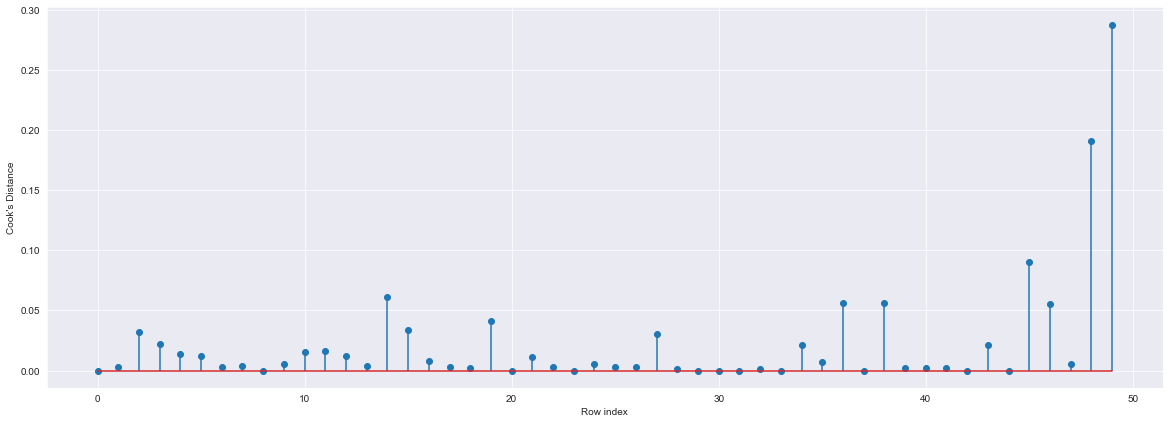

In [42]:
# Plot influencers using stem plot

fig = plt.subplots(figsize = (20, 7))
plt.stem(np.arange(len(startup1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [43]:
# Index and value of influencer where c is more than .5

(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

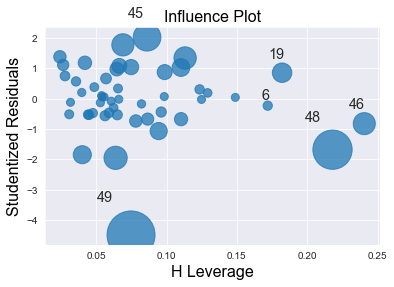

In [44]:
# High influence points

from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [46]:
k = startup1.shape[1]
n = startup1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [47]:
# From above output no influencers are detected

In [48]:
#Exclude variable "Administartion" and generate R-Squared and AIC values

final_ml_a= smf.ols('Profit~R_D_Spend+Marketing_Spend', data = startup1).fit()

In [49]:
(final_ml_a.rsquared, final_ml_a.aic)

(0.9504503015559763, 1057.070772191826)

In [51]:
# Exclude variable "Marketing_Spend" and generate R-Squared and AIC values
final_ml_m = smf.ols('Profit~R_D_Spend+Administration', data = startup1).fit()

In [52]:
(final_ml_m.rsquared, final_ml_m.aic)

(0.9478129385009173, 1059.6636934567293)

In [53]:
# Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved.
# Cook's distance

In [54]:
model_influence_a = final_ml_a.get_influence()
(c_a, _) = model_influence_a.cooks_distance

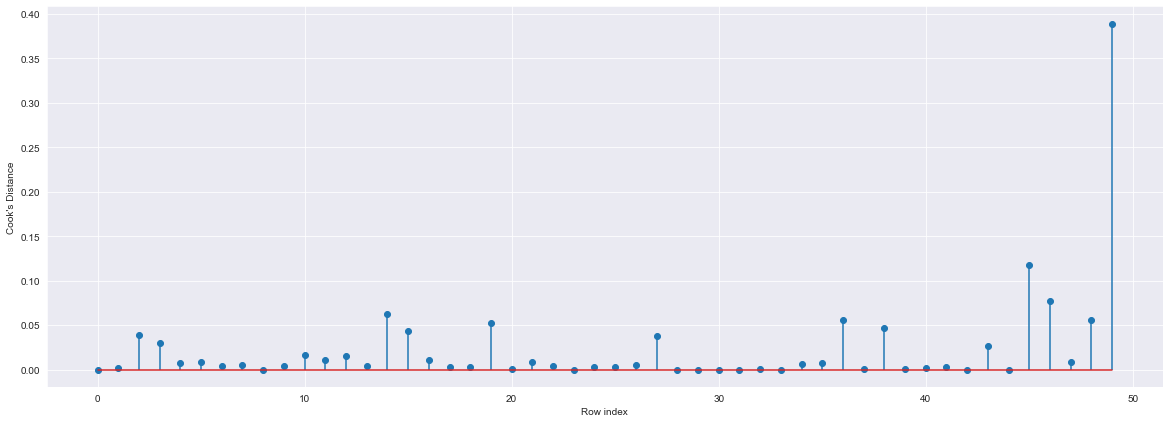

In [55]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(startup1)), np.round(c_a,3));
plt.xlabel('Row index')
plt.ylabel("Cook's Distance");

In [56]:
#index of the data points where c is more than .5

(np.argmax(c_a), np.max(c_a))

(49, 0.3894886227924919)

In [57]:
# Since the value is <1 , we can stop the dignostic process and finalize the model

In [58]:
# Check accuracy of the model

final_ml_a = smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend', data = startup1).fit()

In [59]:
(final_ml_a.rsquared,final_ml_a.aic)

(0.9507459940683246, 1058.7714985998055)

In [62]:
#Predicting new data

new_data = pd.DataFrame({"R_D_Spend":40, "Administration":95, "Marketing_Spend":102}, index = [1])

In [63]:
final_ml_a.predict(new_data)

1    50154.651337
dtype: float64

In [65]:
final_ml_a.predict(startup1.iloc[0:2,])

0    192521.252890
1    189156.768232
dtype: float64

In [66]:
pred_y = final_ml_a.predict(startup1)
pred_y

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111
